# 杭州萧山区项目`WRF-CMAQ`模拟分析
## 模拟结果分析：*`Process Analysis`*

---
*@author: Evan*\
*@date: 2023-08-30*

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('../../src/')
from findpoint import findpoint
import ModelEvaLib as me
from namelist import *

## 读取数据

In [2]:
pa = xr.open_dataset(pafile)

ncfile = pa.HADV_O3
HADV_L1 = np.mean(np.mean(pa.HADV_O3[:,:4,:,:],1),0)
ZADV_L1 = np.mean(np.mean(pa.ZADV_O3[:,:4,:,:],1),0)
HDIF_L1 = np.mean(np.mean(pa.HDIF_O3[:,:4,:,:],1),0)
VDIF_L1 = np.mean(np.mean(pa.VDIF_O3[:,:4,:,:],1),0)
DDEP_L1 = np.mean(np.mean(pa.DDEP_O3[:,:4,:,:],1),0)
CHEM_L1 = np.mean(np.mean(pa.CHEM_O3[:,:4,:,:],1),0)

HADV_L2 = np.mean(np.mean(pa.HADV_O3[:,4:19,:,:],1),0)
ZADV_L2 = np.mean(np.mean(pa.ZADV_O3[:,4:19,:,:],1),0)
HDIF_L2 = np.mean(np.mean(pa.HDIF_O3[:,4:19,:,:],1),0)
VDIF_L2 = np.mean(np.mean(pa.VDIF_O3[:,4:19,:,:],1),0)
DDEP_L2 = np.mean(np.mean(pa.DDEP_O3[:,4:19,:,:],1),0)
CHEM_L2 = np.mean(np.mean(pa.CHEM_O3[:,4:19,:,:],1),0)

In [3]:
number = 50

lon1, lat1 = 119.73, 30.18
lon2, lat2 = 121.42, 30.18

lon3, lat3 = 120.32, 30.69
lon4, lat4 = 120.23, 29.73

lon5, lat5 = 119.92, 30.48
lon6, lat6 = 120.67, 29.84

lon7, lat7 = 119.94, 29.82
lon8, lat8 = 120.91, 30.88

lons1 = np.linspace(lon1,lon2,num=number)
lats1 = np.linspace(lat1,lat2,num=number)

lons2 = np.linspace(lon3,lon4,num=number)
lats2 = np.linspace(lat3,lat4,num=number)

lons3 = np.linspace(lon5,lon6,num=number)
lats3 = np.linspace(lat5,lat6,num=number)

lons4 = np.linspace(lon7,lon8,num=number)
lats4 = np.linspace(lat7,lat8,num=number)

In [4]:
xlabels1 = []
xlabels2 = []
xlabels3 = []
xlabels4 = []
for i in range(6):
    x = lon1 + (lon2 - lon1) / 5 * i
    y = lat1 + (lat2 - lat1) / 5 * i
    xlabels1.append(f"{x:.1f}E\n{y:.2f}N")
for i in range(6):
    x = lon3 + (lon4 - lon3) / 5 * i
    y = lat3 + (lat4 - lat3) / 5 * i
    xlabels2.append(f"{x:.1f}E\n{y:.2f}N")
for i in range(6):
    x = lon5 + (lon6 - lon5) / 5 * i
    y = lat5 + (lat6 - lat5) / 5 * i
    xlabels3.append(f"{x:.1f}E\n{y:.2f}N")
for i in range(6):
    x = lon7 + (lon8 - lon7) / 5 * i
    y = lat7 + (lat8 - lat7) / 5 * i
    xlabels4.append(f"{x:.1f}E\n{y:.2f}N")

# 不同剖面数据于此开始循环

In [16]:
x_index=[]
y_index=[]
for i in range(number):
    # out_x, out_y = findpoint(lons1[i],lats1[i],ncfile)
    # out_x, out_y = findpoint(lons2[i],lats2[i],ncfile)
    # out_x, out_y = findpoint(lons3[i],lats3[i],ncfile)
    out_x, out_y = findpoint(lons4[i],lats4[i],ncfile)
    x_index.append(out_x)
    y_index.append(out_y)

print(x_index)
print(y_index)

[63, 64, 64, 65, 66, 66, 67, 67, 68, 68, 69, 70, 70, 71, 71, 72, 73, 73, 74, 74, 75, 75, 76, 77, 77, 78, 78, 79, 79, 80, 81, 81, 82, 82, 83, 83, 84, 85, 85, 86, 86, 87, 88, 88, 89, 89, 90, 90, 91, 92]
[58, 59, 60, 60, 61, 62, 63, 64, 64, 65, 66, 67, 68, 68, 69, 70, 71, 72, 73, 73, 74, 75, 76, 77, 77, 78, 79, 80, 81, 81, 82, 83, 84, 85, 86, 86, 87, 88, 89, 90, 90, 91, 92, 93, 94, 95, 95, 96, 97, 98]


In [17]:
HADV_L1_sel = np.diagonal(HADV_L1.isel(x=x_index, y=y_index),axis1=0,axis2=1)
ZADV_L1_sel = np.diagonal(ZADV_L1.isel(x=x_index, y=y_index),axis1=0,axis2=1)
HDIF_L1_sel = np.diagonal(HDIF_L1.isel(x=x_index, y=y_index),axis1=0,axis2=1)
VDIF_L1_sel = np.diagonal(VDIF_L1.isel(x=x_index, y=y_index),axis1=0,axis2=1)
CHEM_L1_sel = np.diagonal(CHEM_L1.isel(x=x_index, y=y_index),axis1=0,axis2=1)
DDEP_L1_sel = np.diagonal(DDEP_L1.isel(x=x_index, y=y_index),axis1=0,axis2=1)
HADV_L1_sel.shape

(50,)

In [18]:
HADV_L2_sel = np.diagonal(HADV_L2.isel(x=x_index, y=y_index),axis1=0,axis2=1)
ZADV_L2_sel = np.diagonal(ZADV_L2.isel(x=x_index, y=y_index),axis1=0,axis2=1)
HDIF_L2_sel = np.diagonal(HDIF_L2.isel(x=x_index, y=y_index),axis1=0,axis2=1)
VDIF_L2_sel = np.diagonal(VDIF_L2.isel(x=x_index, y=y_index),axis1=0,axis2=1)
CHEM_L2_sel = np.diagonal(CHEM_L2.isel(x=x_index, y=y_index),axis1=0,axis2=1)
DDEP_L2_sel = np.diagonal(DDEP_L2.isel(x=x_index, y=y_index),axis1=0,axis2=1)
HADV_L2_sel.shape

(50,)

In [19]:
datadict = {}
outdict  = {}
vars     = ['HADV','ZADV','HDIF','VDIF','CHEM','DDEP']

for var in vars:
    for level in ['L1','L2']:
        datadict[f"{var}_{level}"] = np.array(locals()[f"{var}_{level}_sel"])
        outdict[f"{var}_{level}_pos"] = np.maximum(0,datadict[f"{var}_{level}"])
        outdict[f"{var}_{level}_neg"] = np.minimum(0,datadict[f"{var}_{level}"])

## line1

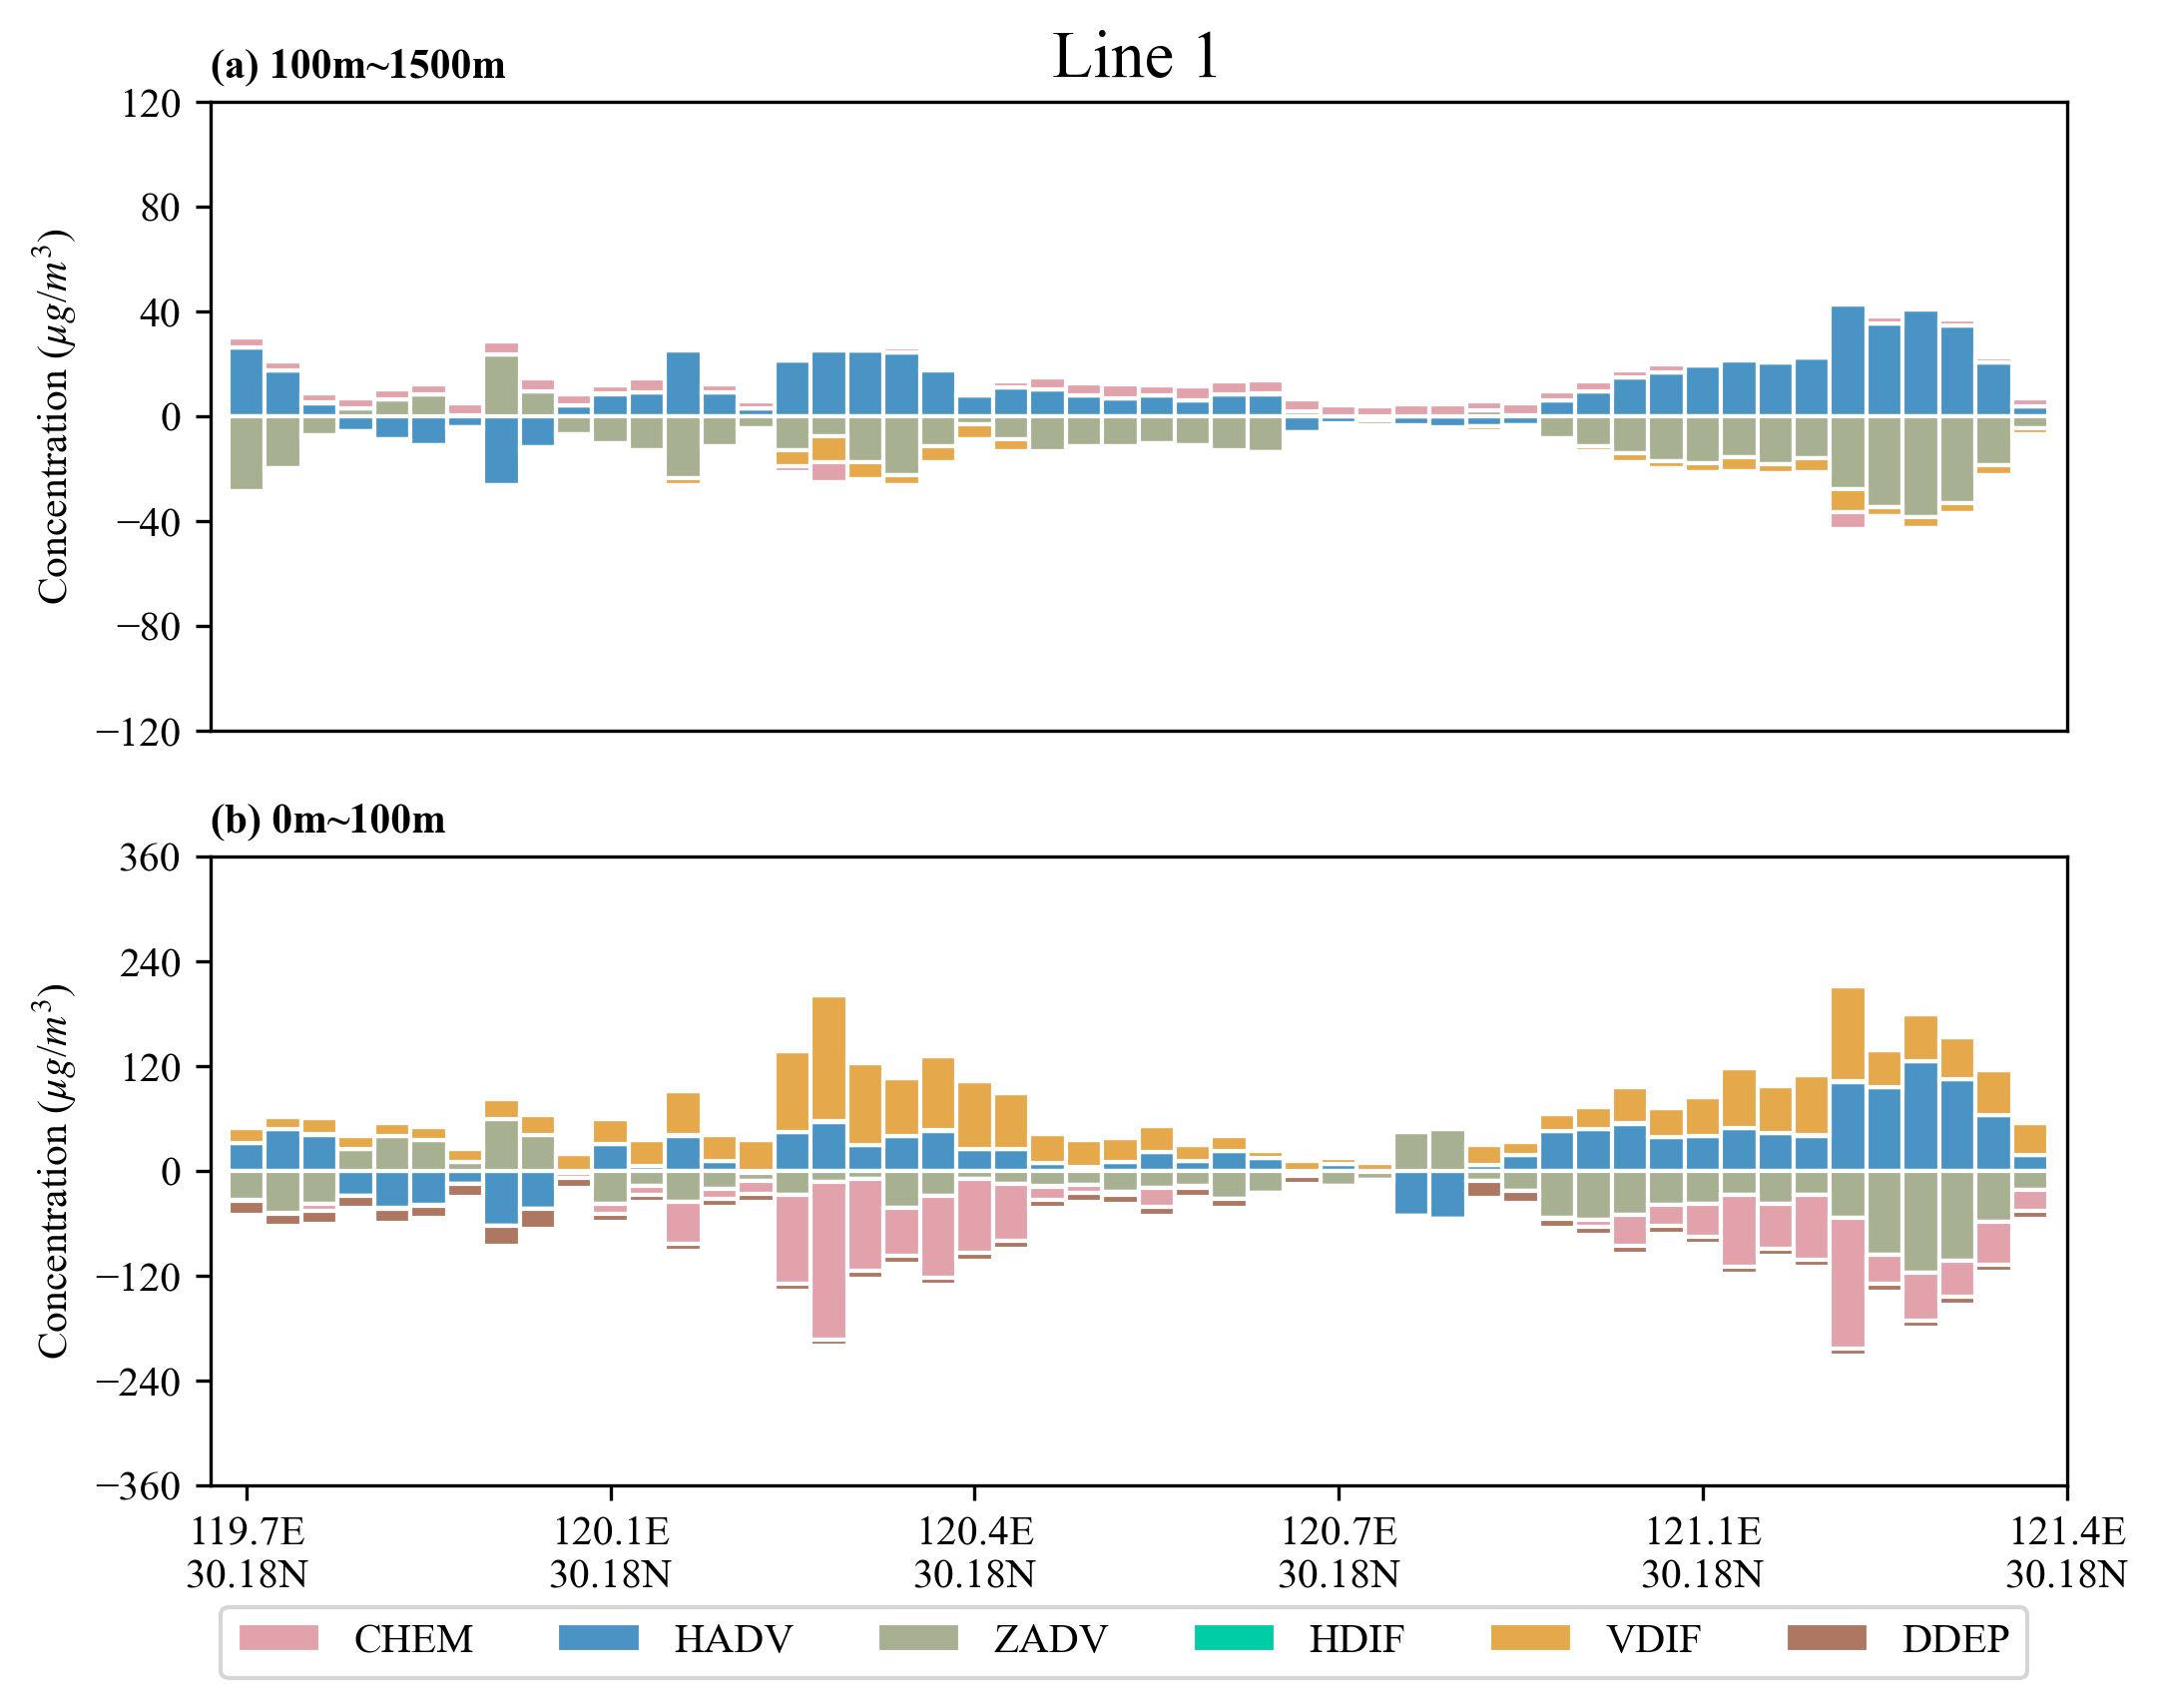

In [16]:
h   = np.arange(0,number)

edgec      = 'white'
color_hadv = '#4994c4'
color_zadv = '#a8b092'
color_hdif = '#00cca6'
color_vdif = '#e5a84b'
color_chem = '#e2a2ac'
color_ddep = '#ad7761'

fig = plt.figure(figsize=(8,6),dpi=300)
ax  = fig.subplots(2,1)

b1=ax[1].bar(h,outdict['HADV_L1_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HADV_L1_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[1].bar(h,outdict['ZADV_L1_pos'],color=color_zadv,bottom=outdict['HADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['ZADV_L1_neg'],color=color_zadv,bottom=outdict['HADV_L1_neg'],width=1,edgecolor=edgec)

b3=ax[1].bar(h,outdict['HDIF_L1_pos'],color=color_hdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HDIF_L1_neg'],color=color_hdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg'],width=1,edgecolor=edgec)

b4=ax[1].bar(h,outdict['VDIF_L1_pos'],color=color_vdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['HDIF_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['VDIF_L1_neg'],color=color_vdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['HDIF_L1_neg'],width=1,edgecolor=edgec)

b5=ax[1].bar(h,outdict['CHEM_L1_pos'],color=color_chem,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['CHEM_L1_neg'],color=color_chem,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg'],
            width=1,edgecolor=edgec)

b6=ax[1].bar(h,outdict['DDEP_L1_pos'],color=color_ddep,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos']+outdict['CHEM_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['DDEP_L1_neg'],color=color_ddep,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg']+outdict['CHEM_L1_neg'],
            width=1,edgecolor=edgec)


b1=ax[0].bar(h,outdict['HADV_L2_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HADV_L2_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[0].bar(h,outdict['ZADV_L2_pos'],color=color_zadv,bottom=outdict['HADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['ZADV_L2_neg'],color=color_zadv,bottom=outdict['HADV_L2_neg'],width=1,edgecolor=edgec)

b3=ax[0].bar(h,outdict['HDIF_L2_pos'],color=color_hdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HDIF_L2_neg'],color=color_hdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg'],width=1,edgecolor=edgec)

b4=ax[0].bar(h,outdict['VDIF_L2_pos'],color=color_vdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['HDIF_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['VDIF_L2_neg'],color=color_vdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['HDIF_L2_neg'],width=1,edgecolor=edgec)

b5=ax[0].bar(h,outdict['CHEM_L2_pos'],color=color_chem,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['CHEM_L2_neg'],color=color_chem,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg'],
            width=1,edgecolor=edgec)

b6=ax[0].bar(h,outdict['DDEP_L2_pos'],color=color_ddep,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos']+outdict['CHEM_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['DDEP_L2_neg'],color=color_ddep,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg']+outdict['CHEM_L2_neg'],
            width=1,edgecolor=edgec)

ax[0].set_xlim(-1,50)
ax[1].set_xlim(-1,50)
ax[0].set_ylim(-120,120)
ax[1].set_ylim(-360,360)
# ax[1].set_xlabel('Coordinates')
ax[0].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[1].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[0].set_xticks([])
ax[1].set_xticks(np.arange(0,51,10))
ax[1].set_xticklabels(xlabels1)
ax[0].set_yticks(np.arange(-120,121,40))
ax[1].set_yticks(np.arange(-360,361,120))

ax[0].set_title('(a) 100m~1500m',fontdict={'fontsize':10,'weight':'bold'},loc='left')
ax[1].set_title('(b) 0m~100m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[1].legend((b5,b1,b2,b3,b4,b6),('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),bbox_to_anchor=(0.99,-0.16),ncol=6)
ax[0].set_title('Line 1',fontdict={'size':16})

# ax[0].fill_betweenx(y=[-500,500],x1=h[23]-0.5,x2=h[30]-0.5,color='orange',alpha=0.5,zorder=0)
# ax[1].fill_betweenx(y=[-500,500],x1=h[23]-0.5,x2=h[30]-0.5,color='orange',alpha=0.5,zorder=0)

plt.show()

## line2

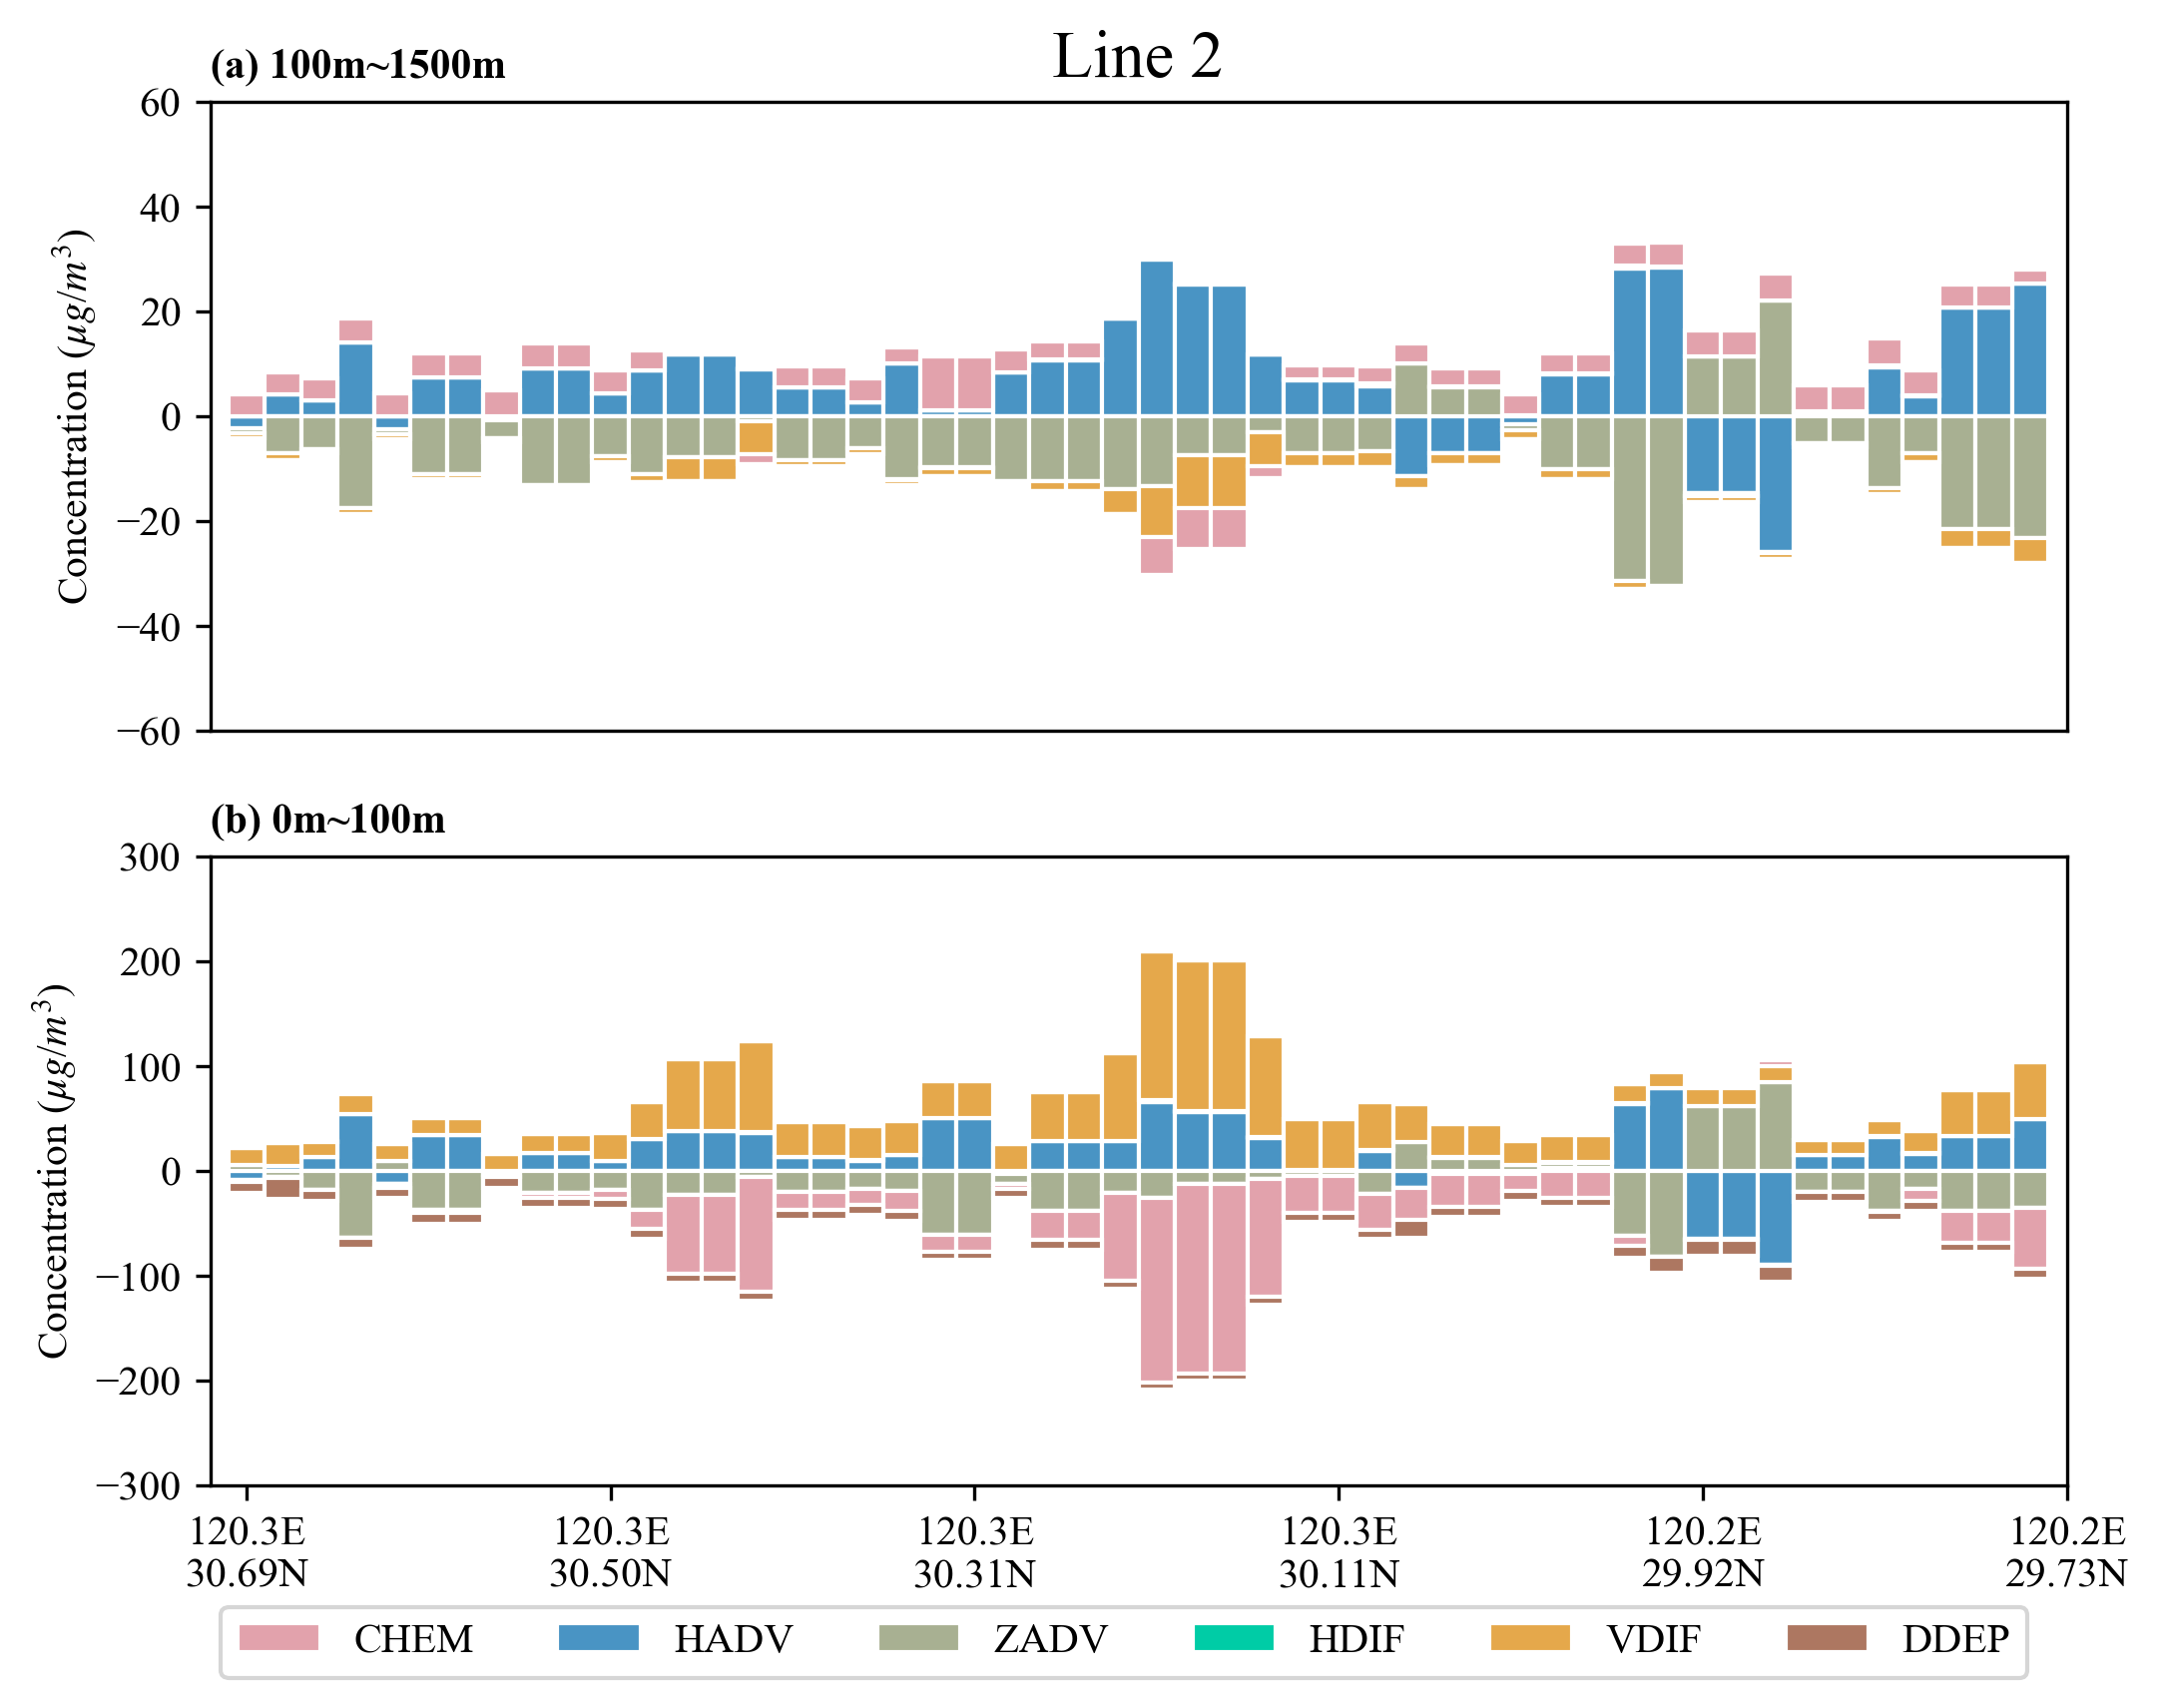

In [10]:
h   = np.arange(0,number)

edgec      = 'white'
color_hadv = '#4994c4'
color_zadv = '#a8b092'
color_hdif = '#00cca6'
color_vdif = '#e5a84b'
color_chem = '#e2a2ac'
color_ddep = '#ad7761'

fig = plt.figure(figsize=(8,6),dpi=300)
ax  = fig.subplots(2,1)

b1=ax[1].bar(h,outdict['HADV_L1_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HADV_L1_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[1].bar(h,outdict['ZADV_L1_pos'],color=color_zadv,bottom=outdict['HADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['ZADV_L1_neg'],color=color_zadv,bottom=outdict['HADV_L1_neg'],width=1,edgecolor=edgec)

b3=ax[1].bar(h,outdict['HDIF_L1_pos'],color=color_hdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HDIF_L1_neg'],color=color_hdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg'],width=1,edgecolor=edgec)

b4=ax[1].bar(h,outdict['VDIF_L1_pos'],color=color_vdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['HDIF_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['VDIF_L1_neg'],color=color_vdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['HDIF_L1_neg'],width=1,edgecolor=edgec)

b5=ax[1].bar(h,outdict['CHEM_L1_pos'],color=color_chem,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['CHEM_L1_neg'],color=color_chem,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg'],
            width=1,edgecolor=edgec)

b6=ax[1].bar(h,outdict['DDEP_L1_pos'],color=color_ddep,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos']+outdict['CHEM_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['DDEP_L1_neg'],color=color_ddep,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg']+outdict['CHEM_L1_neg'],
            width=1,edgecolor=edgec)


b1=ax[0].bar(h,outdict['HADV_L2_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HADV_L2_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[0].bar(h,outdict['ZADV_L2_pos'],color=color_zadv,bottom=outdict['HADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['ZADV_L2_neg'],color=color_zadv,bottom=outdict['HADV_L2_neg'],width=1,edgecolor=edgec)

b3=ax[0].bar(h,outdict['HDIF_L2_pos'],color=color_hdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HDIF_L2_neg'],color=color_hdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg'],width=1,edgecolor=edgec)

b4=ax[0].bar(h,outdict['VDIF_L2_pos'],color=color_vdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['HDIF_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['VDIF_L2_neg'],color=color_vdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['HDIF_L2_neg'],width=1,edgecolor=edgec)

b5=ax[0].bar(h,outdict['CHEM_L2_pos'],color=color_chem,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['CHEM_L2_neg'],color=color_chem,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg'],
            width=1,edgecolor=edgec)

b6=ax[0].bar(h,outdict['DDEP_L2_pos'],color=color_ddep,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos']+outdict['CHEM_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['DDEP_L2_neg'],color=color_ddep,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg']+outdict['CHEM_L2_neg'],
            width=1,edgecolor=edgec)

ax[0].set_xlim(-1,50)
ax[1].set_xlim(-1,50)
ax[0].set_ylim(-60,60)
ax[1].set_ylim(-300,300)
# ax[1].set_xlabel('Coordinates')
ax[0].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[1].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[0].set_xticks([])
ax[1].set_xticks(np.arange(0,51,10))
ax[1].set_xticklabels(xlabels2)
ax[0].set_yticks(np.arange(-60,61,20))
ax[1].set_yticks(np.arange(-300,301,100))

ax[0].set_title('(a) 100m~1500m',fontdict={'fontsize':10,'weight':'bold'},loc='left')
ax[1].set_title('(b) 0m~100m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[1].legend((b5,b1,b2,b3,b4,b6),('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),bbox_to_anchor=(0.99,-0.16),ncol=6)
ax[0].set_title('Line 2',fontdict={'size':16})

# ax[0].fill_betweenx(y=[-500,500],x1=h[32]-0.5,x2=h[38]-0.5,color='orange',alpha=0.5,zorder=0)
# ax[1].fill_betweenx(y=[-500,500],x1=h[32]-0.5,x2=h[38]-0.5,color='orange',alpha=0.5,zorder=0)

plt.show()

## line3

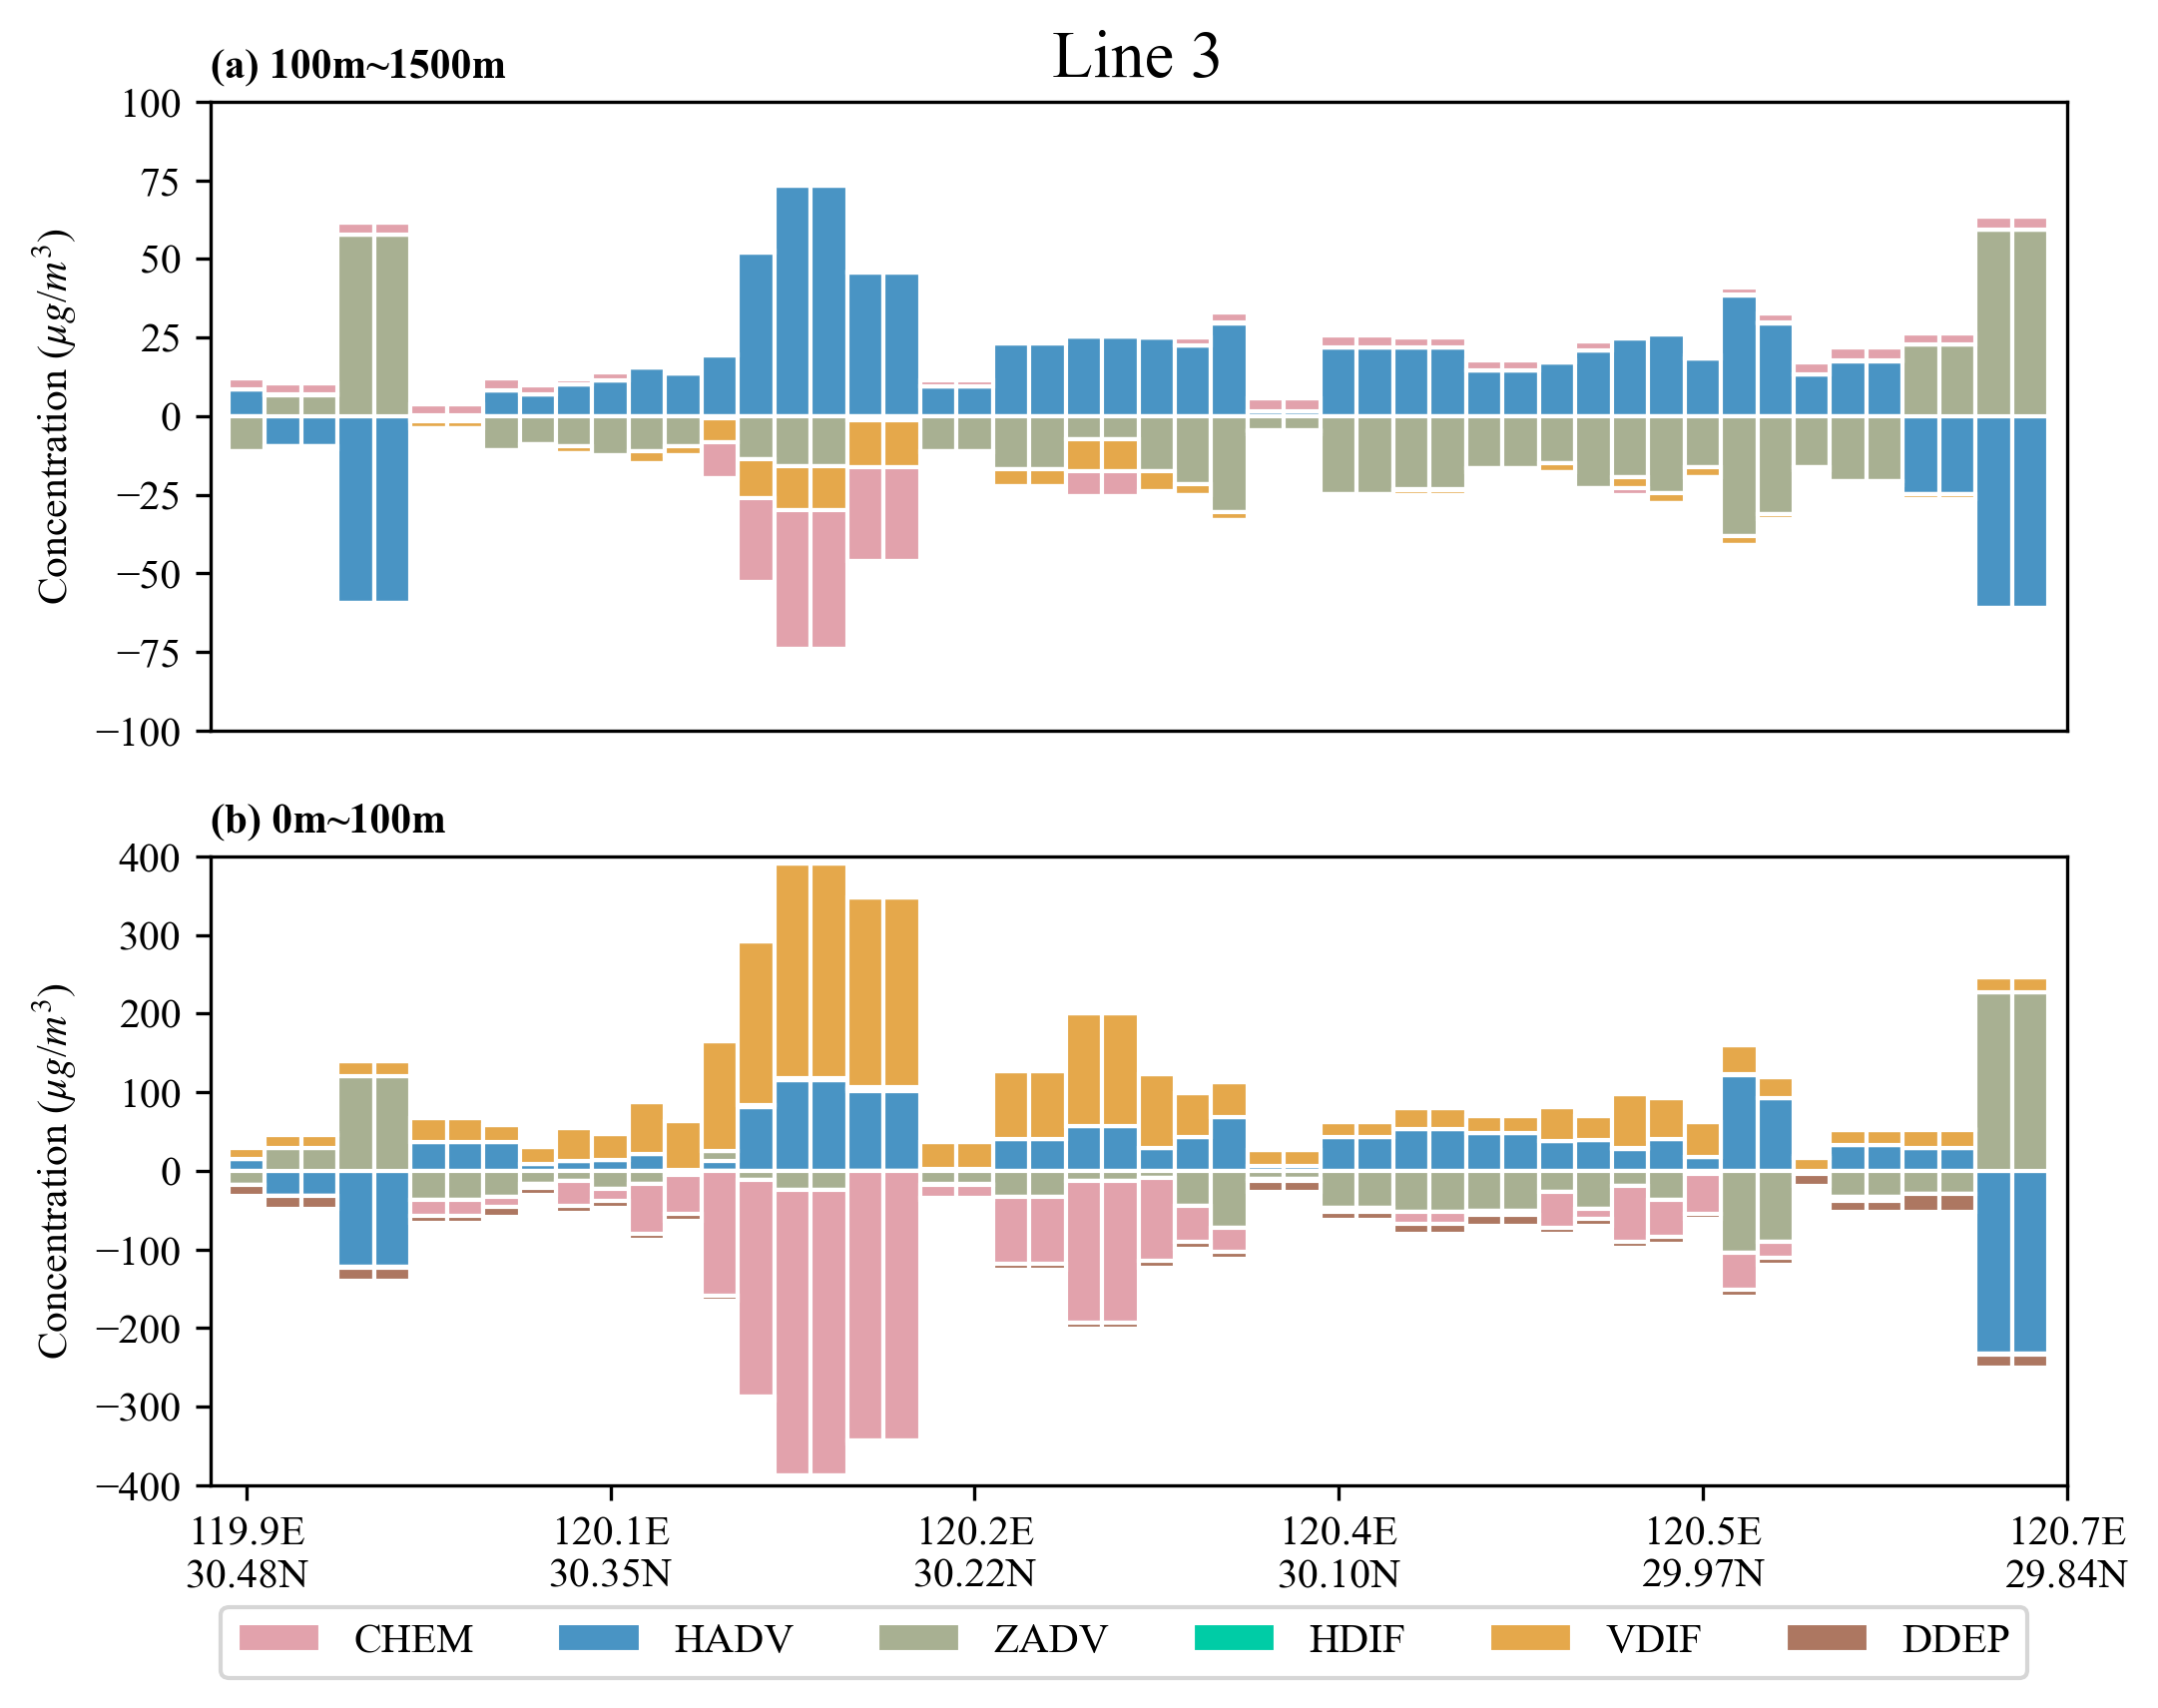

In [15]:
h   = np.arange(0,number)

edgec      = 'white'
color_hadv = '#4994c4'
color_zadv = '#a8b092'
color_hdif = '#00cca6'
color_vdif = '#e5a84b'
color_chem = '#e2a2ac'
color_ddep = '#ad7761'

fig = plt.figure(figsize=(8,6),dpi=300)
ax  = fig.subplots(2,1)

b1=ax[1].bar(h,outdict['HADV_L1_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HADV_L1_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[1].bar(h,outdict['ZADV_L1_pos'],color=color_zadv,bottom=outdict['HADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['ZADV_L1_neg'],color=color_zadv,bottom=outdict['HADV_L1_neg'],width=1,edgecolor=edgec)

b3=ax[1].bar(h,outdict['HDIF_L1_pos'],color=color_hdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HDIF_L1_neg'],color=color_hdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg'],width=1,edgecolor=edgec)

b4=ax[1].bar(h,outdict['VDIF_L1_pos'],color=color_vdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['HDIF_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['VDIF_L1_neg'],color=color_vdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['HDIF_L1_neg'],width=1,edgecolor=edgec)

b5=ax[1].bar(h,outdict['CHEM_L1_pos'],color=color_chem,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['CHEM_L1_neg'],color=color_chem,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg'],
            width=1,edgecolor=edgec)

b6=ax[1].bar(h,outdict['DDEP_L1_pos'],color=color_ddep,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos']+outdict['CHEM_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['DDEP_L1_neg'],color=color_ddep,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg']+outdict['CHEM_L1_neg'],
            width=1,edgecolor=edgec)


b1=ax[0].bar(h,outdict['HADV_L2_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HADV_L2_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[0].bar(h,outdict['ZADV_L2_pos'],color=color_zadv,bottom=outdict['HADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['ZADV_L2_neg'],color=color_zadv,bottom=outdict['HADV_L2_neg'],width=1,edgecolor=edgec)

b3=ax[0].bar(h,outdict['HDIF_L2_pos'],color=color_hdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HDIF_L2_neg'],color=color_hdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg'],width=1,edgecolor=edgec)

b4=ax[0].bar(h,outdict['VDIF_L2_pos'],color=color_vdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['HDIF_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['VDIF_L2_neg'],color=color_vdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['HDIF_L2_neg'],width=1,edgecolor=edgec)

b5=ax[0].bar(h,outdict['CHEM_L2_pos'],color=color_chem,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['CHEM_L2_neg'],color=color_chem,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg'],
            width=1,edgecolor=edgec)

b6=ax[0].bar(h,outdict['DDEP_L2_pos'],color=color_ddep,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos']+outdict['CHEM_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['DDEP_L2_neg'],color=color_ddep,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg']+outdict['CHEM_L2_neg'],
            width=1,edgecolor=edgec)

ax[0].set_xlim(-1,50)
ax[1].set_xlim(-1,50)
ax[0].set_ylim(-100,100)
ax[1].set_ylim(-400,400)
# ax[1].set_xlabel('Coordinates')
ax[0].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[1].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[0].set_xticks([])
ax[1].set_xticks(np.arange(0,51,10))
ax[1].set_xticklabels(xlabels3)
ax[0].set_yticks(np.arange(-100,101,25))
ax[1].set_yticks(np.arange(-400,401,100))

ax[0].set_title('(a) 100m~1500m',fontdict={'fontsize':10,'weight':'bold'},loc='left')
ax[1].set_title('(b) 0m~100m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[1].legend((b5,b1,b2,b3,b4,b6),('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),bbox_to_anchor=(0.99,-0.16),ncol=6)
ax[0].set_title('Line 3',fontdict={'size':16})

# ax[0].fill_betweenx(y=[-500,500],x1=h[18]-0.5,x2=h[32]-0.5,color='orange',alpha=0.5,zorder=0)
# ax[1].fill_betweenx(y=[-500,500],x1=h[18]-0.5,x2=h[32]-0.5,color='orange',alpha=0.5,zorder=0)

plt.show()

## line4

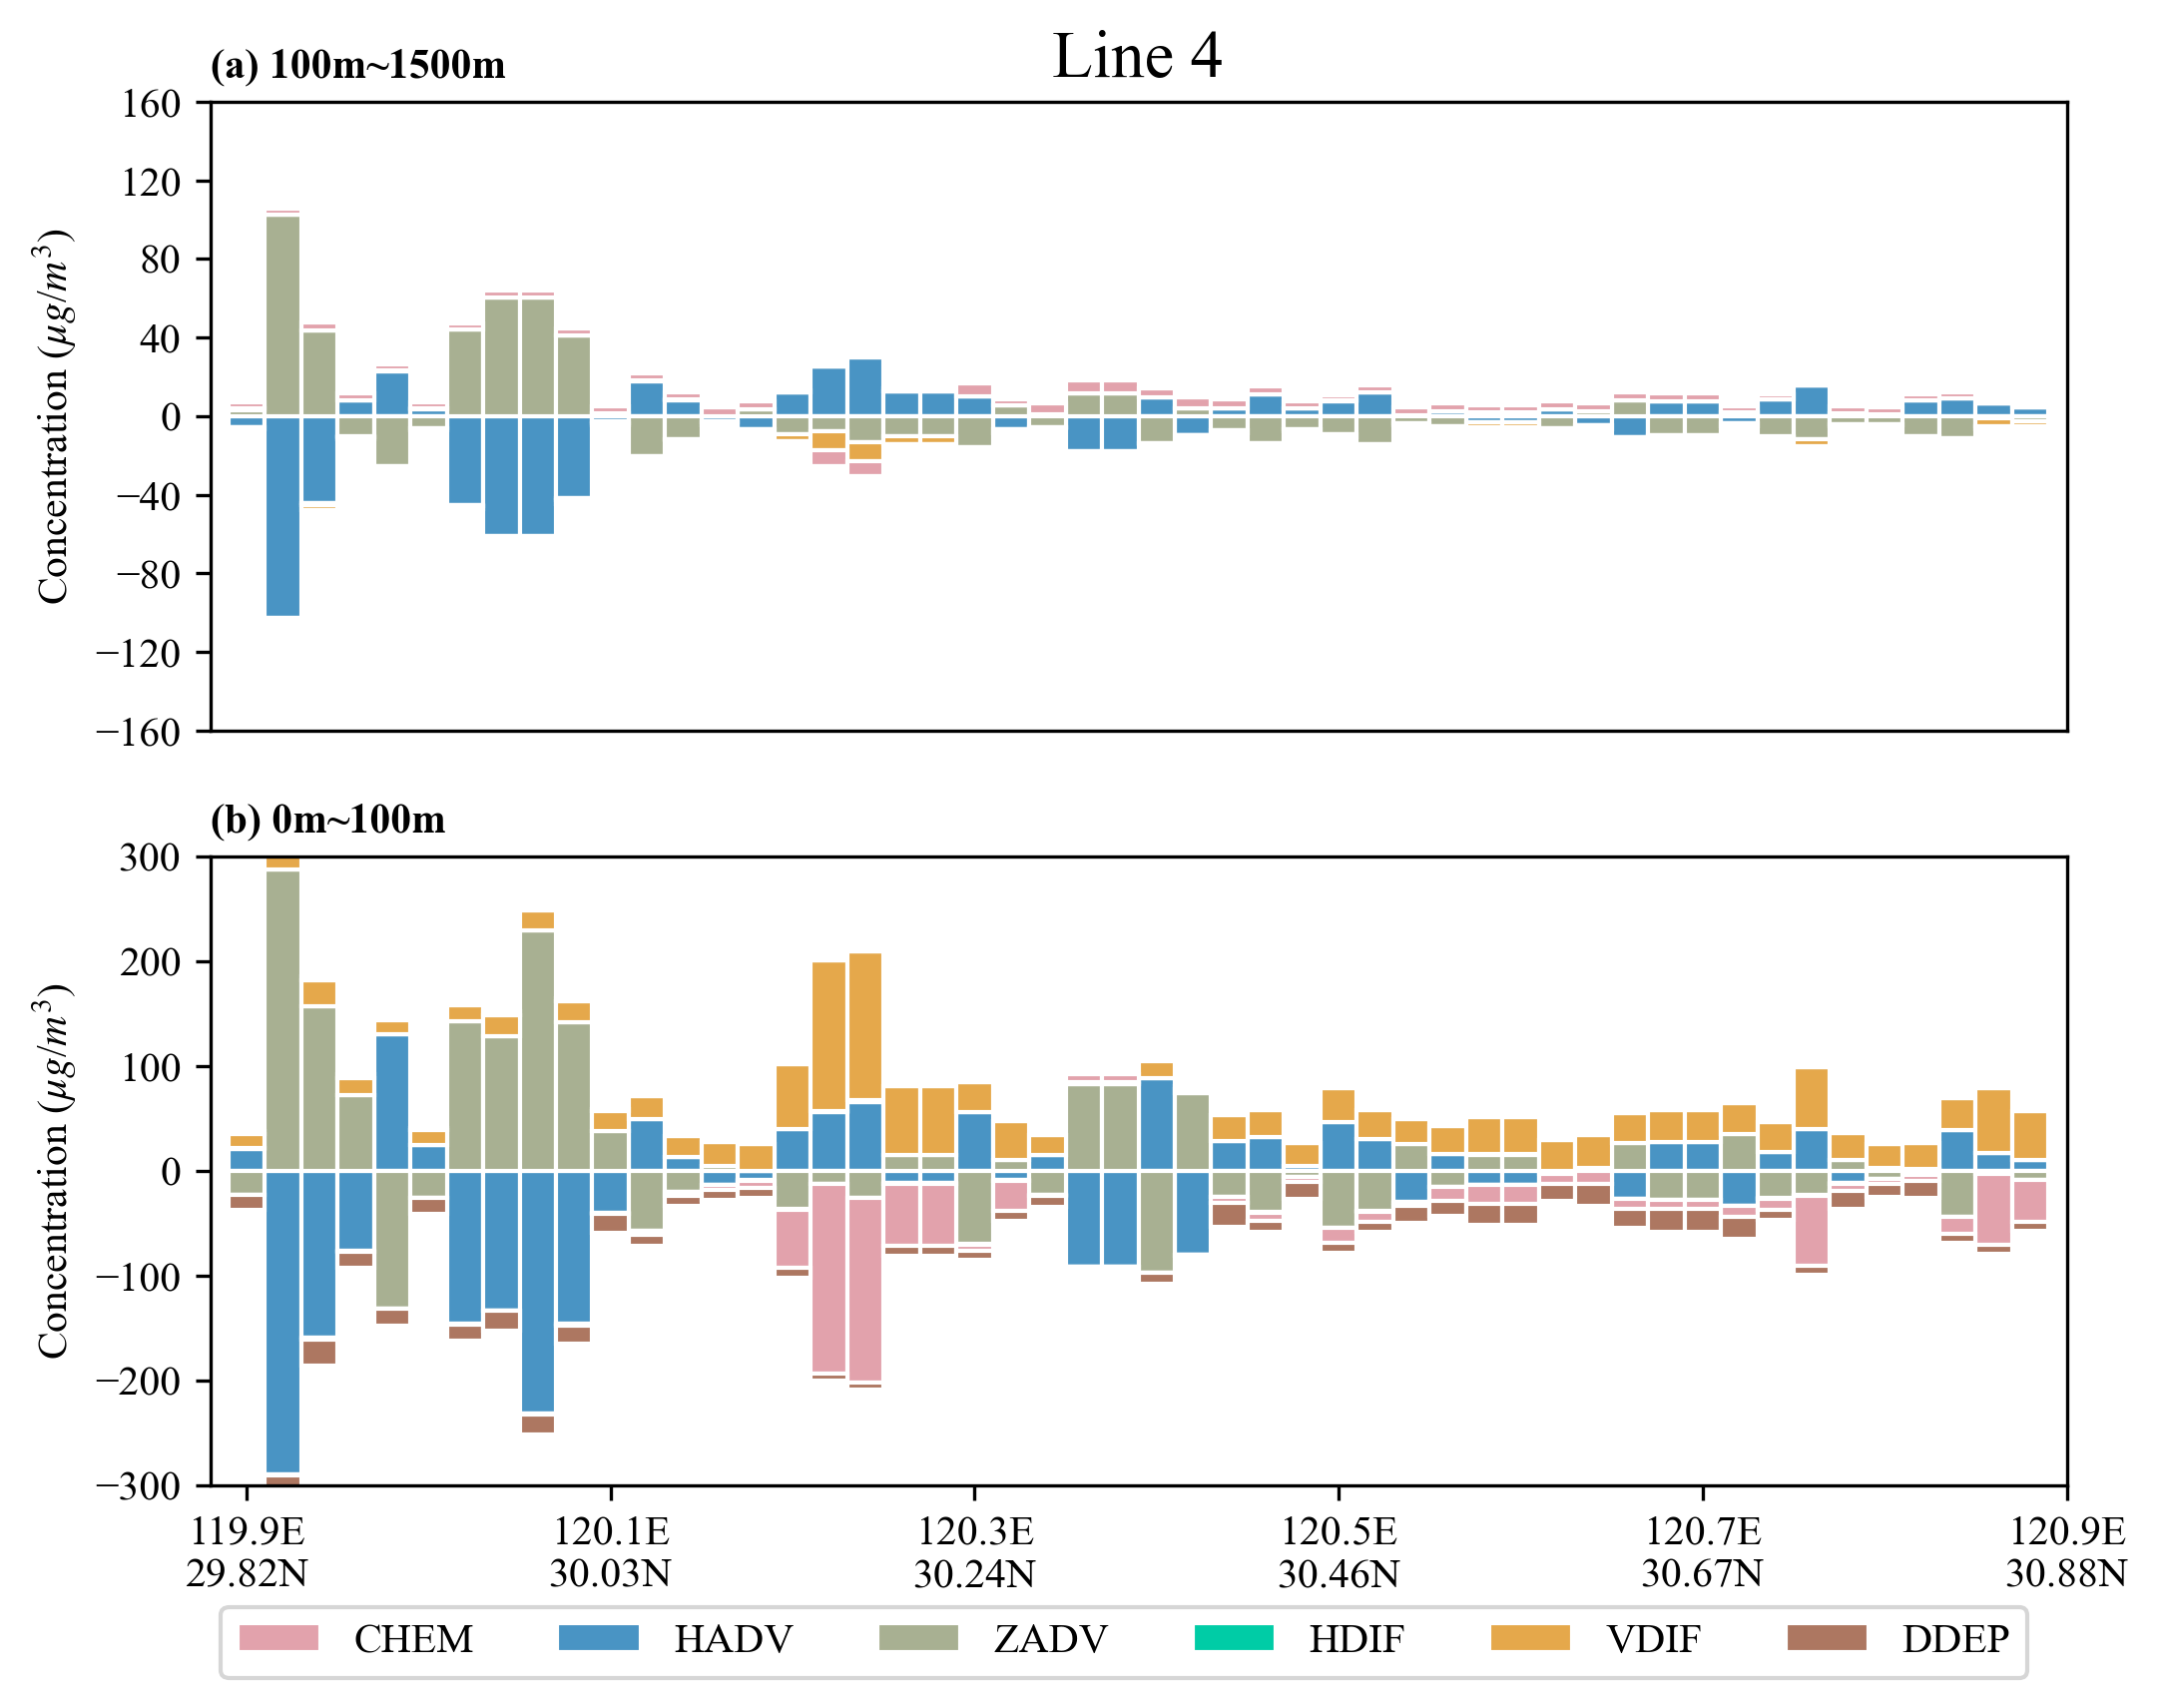

In [20]:
h   = np.arange(0,number)

edgec      = 'white'
color_hadv = '#4994c4'
color_zadv = '#a8b092'
color_hdif = '#00cca6'
color_vdif = '#e5a84b'
color_chem = '#e2a2ac'
color_ddep = '#ad7761'

fig = plt.figure(figsize=(8,6),dpi=300)
ax  = fig.subplots(2,1)

b1=ax[1].bar(h,outdict['HADV_L1_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HADV_L1_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[1].bar(h,outdict['ZADV_L1_pos'],color=color_zadv,bottom=outdict['HADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['ZADV_L1_neg'],color=color_zadv,bottom=outdict['HADV_L1_neg'],width=1,edgecolor=edgec)

b3=ax[1].bar(h,outdict['HDIF_L1_pos'],color=color_hdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['HDIF_L1_neg'],color=color_hdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg'],width=1,edgecolor=edgec)

b4=ax[1].bar(h,outdict['VDIF_L1_pos'],color=color_vdif,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['HDIF_L1_pos'],width=1,edgecolor=edgec)
ax[1].bar(h,outdict['VDIF_L1_neg'],color=color_vdif,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['HDIF_L1_neg'],width=1,edgecolor=edgec)

b5=ax[1].bar(h,outdict['CHEM_L1_pos'],color=color_chem,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['CHEM_L1_neg'],color=color_chem,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg'],
            width=1,edgecolor=edgec)

b6=ax[1].bar(h,outdict['DDEP_L1_pos'],color=color_ddep,bottom=outdict['HADV_L1_pos']+outdict['ZADV_L1_pos']+outdict['VDIF_L1_pos']+outdict['HDIF_L1_pos']+outdict['CHEM_L1_pos'],
            width=1,edgecolor=edgec)
ax[1].bar(h,outdict['DDEP_L1_neg'],color=color_ddep,bottom=outdict['HADV_L1_neg']+outdict['ZADV_L1_neg']+outdict['VDIF_L1_neg']+outdict['HDIF_L1_neg']+outdict['CHEM_L1_neg'],
            width=1,edgecolor=edgec)


b1=ax[0].bar(h,outdict['HADV_L2_pos'],color=color_hadv,width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HADV_L2_neg'],color=color_hadv,width=1,edgecolor=edgec)

b2=ax[0].bar(h,outdict['ZADV_L2_pos'],color=color_zadv,bottom=outdict['HADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['ZADV_L2_neg'],color=color_zadv,bottom=outdict['HADV_L2_neg'],width=1,edgecolor=edgec)

b3=ax[0].bar(h,outdict['HDIF_L2_pos'],color=color_hdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['HDIF_L2_neg'],color=color_hdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg'],width=1,edgecolor=edgec)

b4=ax[0].bar(h,outdict['VDIF_L2_pos'],color=color_vdif,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['HDIF_L2_pos'],width=1,edgecolor=edgec)
ax[0].bar(h,outdict['VDIF_L2_neg'],color=color_vdif,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['HDIF_L2_neg'],width=1,edgecolor=edgec)

b5=ax[0].bar(h,outdict['CHEM_L2_pos'],color=color_chem,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['CHEM_L2_neg'],color=color_chem,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg'],
            width=1,edgecolor=edgec)

b6=ax[0].bar(h,outdict['DDEP_L2_pos'],color=color_ddep,bottom=outdict['HADV_L2_pos']+outdict['ZADV_L2_pos']+outdict['VDIF_L2_pos']+outdict['HDIF_L2_pos']+outdict['CHEM_L2_pos'],
            width=1,edgecolor=edgec)
ax[0].bar(h,outdict['DDEP_L2_neg'],color=color_ddep,bottom=outdict['HADV_L2_neg']+outdict['ZADV_L2_neg']+outdict['VDIF_L2_neg']+outdict['HDIF_L2_neg']+outdict['CHEM_L2_neg'],
            width=1,edgecolor=edgec)

ax[0].set_xlim(-1,50)
ax[1].set_xlim(-1,50)
ax[0].set_ylim(-160,160)
ax[1].set_ylim(-300,300)
# ax[1].set_xlabel('Coordinates')
ax[0].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[1].set_ylabel('Concentration ($\mu$$g$/$m^3$)')
ax[0].set_xticks([])
ax[1].set_xticks(np.arange(0,51,10))
ax[1].set_xticklabels(xlabels4)
ax[0].set_yticks(np.arange(-160,161,40))
ax[1].set_yticks(np.arange(-300,301,100))

ax[0].set_title('(a) 100m~1500m',fontdict={'fontsize':10,'weight':'bold'},loc='left')
ax[1].set_title('(b) 0m~100m',fontdict={'fontsize':10,'weight':'bold'},loc='left')

ax[1].legend((b5,b1,b2,b3,b4,b6),('CHEM','HADV','ZADV','HDIF','VDIF','DDEP'),bbox_to_anchor=(0.99,-0.16),ncol=6)
ax[0].set_title('Line 4',fontdict={'size':16})

# ax[0].fill_betweenx(y=[-500,500],x1=h[18]-0.5,x2=h[32]-0.5,color='orange',alpha=0.5,zorder=0)
# ax[1].fill_betweenx(y=[-500,500],x1=h[18]-0.5,x2=h[32]-0.5,color='orange',alpha=0.5,zorder=0)

plt.show()